In [ ]:
#%%
# 20200817
# sarahfong
# perform logistic regression on:
    # entropy
    # uniqueness
    # length of peaks
    # TF binding. 

# perform on:
    # entire dataset
    # 250bp subsets of dataset.

In [1]:
#from collections import Counter 

import matplotlib.pyplot as plt # plotting graphs
import numpy as np # arthimetic and algebraic operations, stats
from numpy import mean # y tho?
import pandas as pd # matrices and operation

import seaborn as sns # a package for plotting. It makes your plots look nice.

# import SPECIFIC functions from sklearn
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, precision_recall_curve, auc, plot_precision_recall_curve


from scipy import stats # great for stats

import subprocess # great for sending commands to the commandline

In [2]:
#%%
PATH = "/dors/capra_lab/users/fongsl/tres/data/gate/"
#f = "%sfull_tf_arch_qtl_dataframe.bed" % PATH
f = "%sfull_tf_arch_qtl_dataframe_clean_binary.bed" % PATH

RE =  "/dors/capra_lab/users/fongsl/tres/results/gate/stim_unstim/"

In [3]:
#%% clean up double-tab problem, load dataframe
def squeeze_tabs(file):
    outfile = file.split(".")[0] + "_clean.bed"
    cmd = '''tr -s '\t' < %s > %s''' %(file, outfile)
    subprocess.call(cmd, shell = True)
    return outfile

In [27]:
# sarah doesn't like all of the text for transcription factors. Let's turn this into a variable

tfs = ['AIRE','AP1/1','AP1/2','ARI5A',\
     'ARI5B','BATF','BCL6/1','BCL6/2','CCAAT/CEBP','CENBP','CPEB1','CREB/ATF/1',\
     'CREB/ATF/2','CREB/ATF/3','CREB3/XBP1','CTCF','CUX/1','CUX/2','CUX/3','CUX/4',\
     'DDIT3+CEBPA','DMRT1','DMRT3','E2F/1','E2F/2','E2F/3','E2F/4','EBF1','EGR',\
     'ETS/1','ETS/2','EVI1/MECOM','EWSR1/FLI1','Ebox/CACCTG','Ebox/CACGTG/1',\
     'Ebox/CACGTG/2','Ebox/CAGATGG','Ebox/CAGCTG','Ebox/CATATG','FEZF1', 'FOX/1',\
     'FOX/2','FOX/3','FOX/4','FOX/5','FOX/6','FOX/7','FOX/8','FOX/9',\
     'GATA','GC-tract','GCM','GFI','GLI','GLIS','GMEB2/1','GMEB2/2','GMEB2/3',\
     'GRHL','HAND1','HD/1','HD/10','HD/11','HD/12','HD/14','HD/15',\
     'HD/16','HD/17','HD/18','HD/19','HD/2','HD/21','HD/22','HD/23','HD/24','HD/25','HD/3',\
     'HD/4','HD/5','HD/6','HD/7','HD/8','HD/9','HEN1','HIC/1','HIC/2',\
     'HIF','HINFP1/1','HINFP1/2','HINFP1/3','HOMEZ','HSF','HSFY2','INSM1','IRF/1',\
     'IRF/2','IRF/3','IRF/4',\
     'KAISO','KLF/SP/1','KLF/SP/2',\
     'KLF/SP/3','LEF1','LIN54','MAF','MBD2','MECP2','MEF2','MFZ1','MIES','MTF1',\
     'MYB/1','MYB/2','MYB/3','MYB/4','MYB/5','MZF1','NFAC/2','NFAT/1','NFAT/2','NFAT/3',\
     'NFAT/4','NFI/1','NFI/3','NFKB/1','NFKB/2','NFKB/3','NFY','NR/1','NR/10','NR/11',\
     'NR/12','NR/13','NR/14','NR/15','NR/16','NR/17','NR/18','NR/19','NR/2','NR/20',\
     'NR/3','NR/4','NR/5','NR/6','NR/7','NR/8','NR/9','NRF1','OCT4+SOX2','OSR2','OVOL1',\
     'P53-like/1','P53-like/2','P53-like/3','PAX/1','PAX/2','PLAG1','POU/1','POU/2','POU/3',\
     'PRDM1','PRDM14','PRDM16','PRDM4','PRDM5','PRDM9','PROX1','RBPJ','REL-halfsite',\
     'REST/NRSF','RFX/1','RFX/2','RFX/3','RUNX/1','RUNX/2','SCRT1','SIX/1','SIX/2','SMAD',\
     'SMARCA1','SMARCA5','SOX/1','SOX/3','SOX/4','SOX/5','SOX/6','SOX/7','SOX/8',\
     'SPDEF/1','SPDEF/2','SPI','SPZ1','SREBF1','SRF','STAT/1','STAT/2','TATA','TBX/1',\
     'TBX/2','TBX/3','TBX/4','TCF/LEF','TEAD','TFAP2/1','TFAP2/2','TFCP2','THAP1','YY1',\
     'ZBED1','ZBTB14','ZBTB48','ZBTB49','ZBTB6','ZBTB7A','ZFN121','ZFX','ZIC','ZIC/2',\
     'ZIM3','ZKSCAN1','ZNF134','ZNF136','ZNF140','ZNF143','ZNF146','ZNF232','ZNF24',\
     'ZNF250','ZNF257','ZNF274','ZNF28','ZNF282','ZNF306','ZNF317','ZNF320','ZNF324',\
     'ZNF329','ZNF331','ZNF332','ZNF335','ZNF354','ZNF382','ZNF384/1','ZNF384/2',\
     'ZNF41','ZNF410','ZNF418','ZNF423','ZNF431','ZNF435','ZNF436','ZNF449','ZNF490',\
     'ZNF524','ZNF528','ZNF547','ZNF549','ZNF554','ZNF563','ZNF57','ZNF586','ZNF652',\
     'ZNF667','ZNF680','ZNF708','ZNF713','ZNF768','ZNF784','ZNF85','ZSCAN3','ZSCAN4']



In [47]:
if "clean" not in f:
    cleanf = squeeze_tabs(f)
    df = pd.read_csv(cleanf, sep = '\t', header = None).drop_duplicates()
    # name columns

    df.columns = [ 'chr','start','end','peak_id','state',\
     'peak_len','tfbs_count','tfbs_density','uniq_tfbs_count','uniq_score','ent',\
      tfs,
     "chr_q", "start_q", "end_q", "qtl_id", "qtl_overlap_len"]

     # create qtl-overlap binary
    df["qtl_overlap"] = 0
    df.loc[df.qtl_overlap_len > 0, "qtl_overlap"] = 1

    # create state binary
    df["state_bin"] = 0
    df.loc[df.state == "shared_only", "state_bin"] = -1 # shared_only = -1
    df.loc[df.state == "stim_only", "state_bin"] = 1 # stim_only = +1
    df.to_csv(cleanf, sep = '\t', index = False)
else:

    cleanf = f
    df = pd.read_csv(cleanf, sep = '\t').drop_duplicates() # read the data file into a matrix
   
    ninety_fifth = df.peak_len.quantile(q=0.95)# what is the 95% of peak lengths? (i.e. really long peak lengths)
    df = df.loc[df.peak_len < ninety_fifth] # remove 95% outliers  # let's reduce the data array to exclude any peak 
    #that is greater than the 95% of peak lengths

In [49]:
df.shape # what are the dimensions of the array?

(60458, 290)

In [50]:
df.head() # what does the dataframe look like? Let's peak.

,chr,start,end,peak_id,state,peak_len,tfbs_count,tfbs_density,uniq_tfbs_count,uniq_score,...,ZNF652,ZNF667,ZNF680,ZNF708,ZNF713,ZNF768,ZNF784,ZNF85,ZSCAN3,ZSCAN4
0,chr10,98361327,98361628,chr10:100121084-100121385,stim_only,301,85,0.282392,56,0.658824,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,chr10,98404247,98404859,chr10:100164004-100164616,stim_only,612,152,0.248366,82,0.539474,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,chr10,98414952,98415534,chr10:100174709-100175291,shared_only,582,385,0.661512,113,0.293506,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,chr10,98428333,98428590,chr10:100188090-100188347,shared_only,257,85,0.330739,62,0.729412,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,chr10,98446351,98447156,chr10:100206108-100206913,shared_only,805,679,0.843478,124,0.182622,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


(0.0, 1000.0)

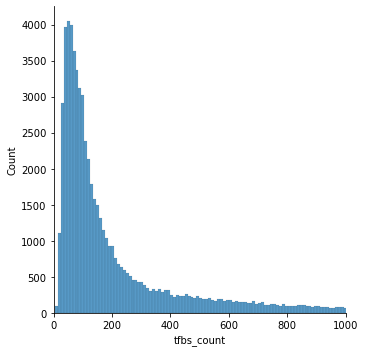

In [12]:
# let's look at a distribution

sns.displot(df.tfbs_count)
plt.xlim(0,1000)

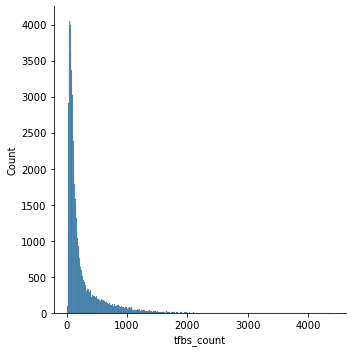

In [13]:
sns.displot(df["tfbs_count"]) # two different ways to do the same thing. 

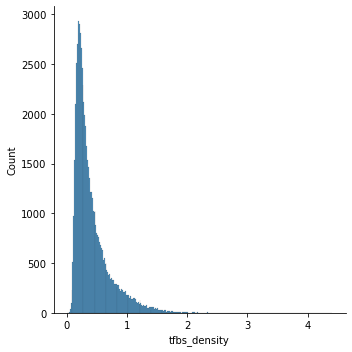

In [14]:
# let's look at TFBS density (#TFBS/length (bp) per enhancer)

sns.displot(df.tfbs_density)

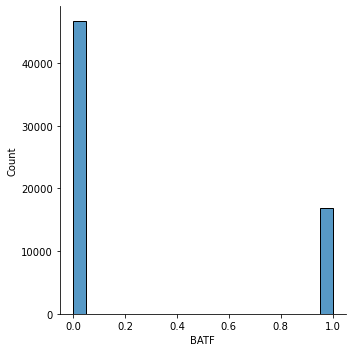

In [18]:
# let's look at a transcription factor 
sns.displot(df['BATF'])

In [ ]:
# let's look at a transcription factor 
sns.displot(df['AP1/1'])

In [17]:
df[["peak_id", "tfbs_density"]].sort_values(by = "tfbs_density", ascending = False)

,peak_id,tfbs_density
45730,chr4:26211197-26211388,4.408377
56045,chr7:71144999-71145507,4.027559
12894,chr15:60642188-60642367,3.893855
39188,chr2:7628725-7628901,3.409091
63479,chrX:8137212-8137746,3.331461
...,...,...
48850,chr5:4973973-4974160,0.037433
56714,chr8:104576356-104576517,0.037267
54872,chr7:155751113-155751387,0.029197
41060,chr3:143622074-143622276,0.019802


In [15]:
df["peak_len"].describe() # get information about basic statistics for a column in the matrix. 

count    63644.000000
mean       490.102743
std        353.552354
min        154.000000
25%        228.000000
50%        363.000000
75%        645.000000
max      13008.000000
Name: peak_len, dtype: float64

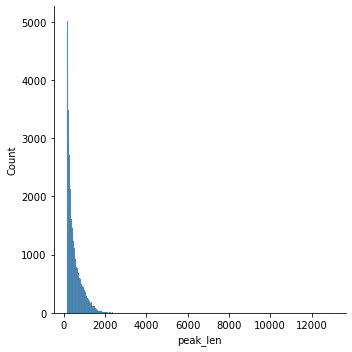

In [12]:
sns.displot(df.peak_len)

# Let's scale some data

In [118]:
# let's scale the peak length
colnames_to_scale = ['peak_len','tfbs_count','tfbs_density','uniq_tfbs_count']
X = df[colnames_to_scale]

In [119]:
X.min(axis=0) # what is the min size of an enhancer?

peak_len           154.000000
tfbs_count           4.000000
tfbs_density         0.007564
uniq_tfbs_count      2.000000
dtype: float64

In [120]:
X.max(axis=0) # what is the largest size of an enhancer?

peak_len           1206.000000
tfbs_count         2254.000000
tfbs_density          4.408377
uniq_tfbs_count     164.000000
dtype: float64

In [124]:
from sklearn.preprocessing import MinMaxScaler # import the MinMaxScaler function
scaler = MinMaxScaler() # initialize the scaler function
scaler.fit(X) # fit the model
scaler.data_max_ # let's look at the max

array([1206.        , 2254.        ,    4.40837696,  164.        ])

In [125]:
scaler.data_range_ # let's look at the range

array([1052.        , 2250.        ,    4.40081267,  162.        ])

In [ ]:
 # let's transform the data into a dataframe array
scaled_data = pd.DataFrame(scaler.transform(X), columns = colnames_to_scale) 

scaled_data.head()

In [128]:
# let's make a dataframe that has the scaled data with the TF data and enhancer information
to_merge_colnames = tfs + ['uniq_score','ent', 'state'] # list of column names 

In [129]:
merged_and_scaled_data = pd.merge(scaled_data, df[to_merge_colnames], left_index = True, right_index = True)
merged_and_scaled_data.head()

,peak_len,tfbs_count,tfbs_density,uniq_tfbs_count,AIRE,AP1/1,AP1/2,ARI5A,ARI5B,BATF,...,ZNF708,ZNF713,ZNF768,ZNF784,ZNF85,ZSCAN3,ZSCAN4,uniq_score,ent,state
0,0.139734,0.036000,0.062449,0.333333,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.658824,5.603164,stim_only
1,0.435361,0.065778,0.054718,0.493827,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.539474,5.979183,stim_only
2,0.406844,0.169333,0.148597,0.685185,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.293506,5.551870,shared_only
3,0.097909,0.036000,0.073435,0.370370,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.729412,5.779864,shared_only
4,0.618821,0.300000,0.189945,0.753086,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.182622,5.590985,shared_only


In [130]:
# how many enhancers belong to each state?
merged_and_scaled_data.groupby("state")["peak_len"].count()

state
shared_only    24500
stim_only      26083
unstim_only     6810
Name: peak_len, dtype: int64

In [132]:
# remove state value from to_merge_colnames list so that logistic regression does not fit
# the variable "state" when it is trying to predict "state"
to_merge_colnames.remove("state")

In [138]:
#%% Xvars,yvars
Xvars = to_merge_colnames + ["peak_len", "tfbs_count", "tfbs_density", "uniq_tfbs_count"] # add two lists of strings together

yvars = ["state"] # resting (unstimulated) or active (stimulated)

In [139]:
#%% STIM V. UNSTIM ANALYSIS
df_stim_unstim = merged_and_scaled_data.loc[merged_and_scaled_data.state !="shared_only"] # exclude shared only state
df_stim_unstim.head()

,peak_len,tfbs_count,tfbs_density,uniq_tfbs_count,AIRE,AP1/1,AP1/2,ARI5A,ARI5B,BATF,...,ZNF708,ZNF713,ZNF768,ZNF784,ZNF85,ZSCAN3,ZSCAN4,uniq_score,ent,state
0,0.139734,0.036000,0.062449,0.333333,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.658824,5.603164,stim_only
1,0.435361,0.065778,0.054718,0.493827,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.539474,5.979183,stim_only
6,0.260456,0.056000,0.067300,0.425926,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.546154,5.630006,stim_only
7,0.029468,0.015556,0.046184,0.185185,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.820513,4.926428,stim_only
9,0.041825,0.020444,0.055663,0.160494,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.560000,4.427601,stim_only


# train, test split

In [142]:
# subset the data array by X and y vars
X = df_stim_unstim [Xvars]
y = df_stim_unstim [yvars]

['AIRE',
 'AP1/1',
 'AP1/2',
 'ARI5A',
 'ARI5B',
 'BATF',
 'BCL6/1',
 'BCL6/2',
 'CCAAT/CEBP',
 'CENBP',
 'CPEB1',
 'CREB/ATF/1',
 'CREB/ATF/2',
 'CREB/ATF/3',
 'CREB3/XBP1',
 'CTCF',
 'CUX/1',
 'CUX/2',
 'CUX/3',
 'CUX/4',
 'DDIT3+CEBPA',
 'DMRT1',
 'DMRT3',
 'E2F/1',
 'E2F/2',
 'E2F/3',
 'E2F/4',
 'EBF1',
 'EGR',
 'ETS/1',
 'ETS/2',
 'EVI1/MECOM',
 'EWSR1/FLI1',
 'Ebox/CACCTG',
 'Ebox/CACGTG/1',
 'Ebox/CACGTG/2',
 'Ebox/CAGATGG',
 'Ebox/CAGCTG',
 'Ebox/CATATG',
 'FEZF1',
 'FOX/1',
 'FOX/2',
 'FOX/3',
 'FOX/4',
 'FOX/5',
 'FOX/6',
 'FOX/7',
 'FOX/8',
 'FOX/9',
 'GATA',
 'GC-tract',
 'GCM',
 'GFI',
 'GLI',
 'GLIS',
 'GMEB2/1',
 'GMEB2/2',
 'GMEB2/3',
 'GRHL',
 'HAND1',
 'HD/1',
 'HD/10',
 'HD/11',
 'HD/12',
 'HD/14',
 'HD/15',
 'HD/16',
 'HD/17',
 'HD/18',
 'HD/19',
 'HD/2',
 'HD/21',
 'HD/22',
 'HD/23',
 'HD/24',
 'HD/25',
 'HD/3',
 'HD/4',
 'HD/5',
 'HD/6',
 'HD/7',
 'HD/8',
 'HD/9',
 'HEN1',
 'HIC/1',
 'HIC/2',
 'HIF',
 'HINFP1/1',
 'HINFP1/2',
 'HINFP1/3',
 'HOMEZ',
 'HSF',
 'HSFY2

In [147]:
# split up the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [148]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((24669, 278), (24669, 1), (8224, 278), (8224, 1))

In [152]:
y_test

,state
6028,stim_only
28812,unstim_only
15482,stim_only
24782,stim_only
45118,stim_only
...,...
3047,stim_only
6886,stim_only
17919,stim_only
440,stim_only


# add tenfold cross validation, logistic regression (old)

In [161]:
def calc_tenfold_cv_auroc(model, X, y):

    # fit training data to logistic regression and measure mean auroc score from cross validation
    # define evaluation procedure
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
    
    # evaluate cross_validation scores in model
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    
    # summarize performance
    print('Mean ROC AUC: %.3f' % mean(scores))
    
    return cv

In [154]:
#%% LOGISTIC REGRESSION FUNCTION
def logistic_regression(X, y, sid):

    # call logistic regression model
    model = LogisticRegression(max_iter = 7000, class_weight = "balanced")

    # 10-fold cross validation to measure mean auroc score
    cv = calc_tenfold_cv_auroc(model, X, y)

    tprs = []
    aucs = []
    prs = []
    pr_aucs = []
    mean_recall = np.linspace(0, 1, 100)
    mean_baseline = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, (ax, ax2) = plt.subplots(ncols = 2, figsize = (12,6)) # for roc_auc

    for i, (train, test) in enumerate(cv.split(X, y)):
        model.fit(X[train], y[train])
        
        viz = plot_roc_curve(model, X[test], y[test],
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr) # interpolate mean_fpr
        interp_tpr[0] = 0.0

        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

        y_pred = model.predict(X[test]) # make predictions on test
        y_probs = model.predict_proba(X[test])[:,1]

        cm = metrics.confusion_matrix(y[test], y_pred) # confusion matrix

        baseline = cm[1].sum()/cm.sum() # calculate baseline as true /total pos.
        mean_baseline.append(baseline)


        precision, recall, _ = precision_recall_curve(y[test],y_probs)
        
        prs.append(np.interp(mean_recall, precision, recall)) # add predictions
        pr_auc = auc(recall, precision) # calculate aucs
        pr_aucs.append(pr_auc) # append to pr_aucs
        prcurve = plot_precision_recall_curve(model, X[test], y[test],\
        name='PR fold {}'.format(i),
        alpha=0.3, lw=1, ax=ax2)

        
        ax2.set(xlabel = "Recall", ylabel= "Precision",\
        title = "PR - %s" % (sid))
        ax2.legend(loc="upper right")
        ax2.axhline(baseline, ls = '--')#, color ='k')

    #summarize roc_auc
    
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="auROC %s" % (sid))
    ax.legend(loc = "lower right")

    # summarize pr

    mean_precision = np.mean(prs, axis=0)
    mean_auc = auc(mean_recall, mean_precision)
    std_auc = np.std(pr_aucs)
    #mean_recall[-1] = np.mean(mean_baseline)
    ax2.plot(mean_precision, mean_recall, color='navy',
             label=r'Mean (AUCPR = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2)
    ax2.axhline(np.mean(mean_baseline), ls = "--", color ="r",\
      label='mean_baseline')

    ax2.set(xlim = [-0.05, 1.05], ylim = [(np.mean(mean_baseline)-0.1), 1.05],
    xlabel = 'Recall', ylabel = 'Precision', title="PR %s" % (sid))
    ax2.legend(loc = "lower right")

    plt.show()

    return fig, model

# Let's dissect the logistic regression function (which is too big, too unwieldy, and needs to be refactored!)

In [156]:
# call model
model = LogisticRegression(max_iter = 7000, class_weight = "balanced")

In [163]:
# run 10x cross validation and get auroc scores
cv = calc_tenfold_cv_auroc(model, X, y)

RepeatedStratifiedKFold(n_repeats=1, n_splits=10, random_state=1)

# these are lists for if you were to run cross-validation on the training set and plot model performance on those splits. We don't use them here!

In [157]:
# initialize a bunch of lists for collecting data
tprs, aucs = [], []


prs = []
pr_aucs = []
mean_recall = np.linspace(0, 1, 100)
mean_baseline = []
mean_fpr = np.linspace(0, 1, 100)

# FIT THE MODEL!!!

In [158]:
# fit the model w/ training data
model.fit(X_train, y_train)

/home/fongsl/.conda/envs/sfenv/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(class_weight='balanced', max_iter=7000)

# plot the auroc curve function

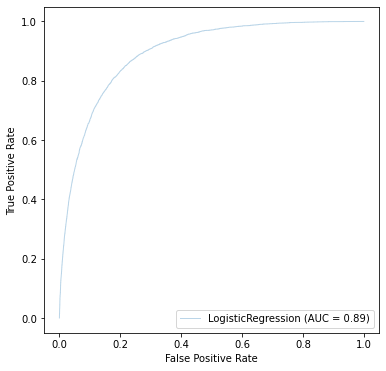

In [178]:
def plot_auroc_curve(model, X_train, y_train, mean_fpr, tprs, aucs):
    
    fig, ax = plt.subplots(figsize=(6,6)) # make a plot

    viz = plot_roc_curve(model, X_train, y_train, 
                         #name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax) # call the plot_roc_curve function from sklearn and fill plot
    
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr) # interpolate mean_fpr for plotting 
    interp_tpr[0] = 0.0 # make sure that the plot intersects (0,0)
    
    tprs.append(interp_tpr) # append the interpolated true positive rate to list, 
    aucs.append(viz.roc_auc) # append the roc_auc value to list

    return tprs, aucs

## fit the model to the test data

In [ ]:
y_pred = model.predict(X_test) # make predictions on the held-out testset
y_probs = model.predict_proba(X_test)[:,1] # prediction probabilities.

# confusion matrix

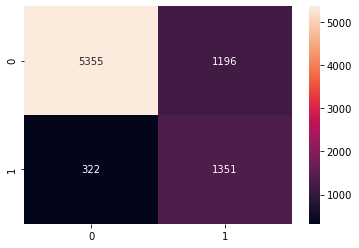

In [194]:
def get_confusion_matrix(y_test, y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred) # confusion matrix
    cm_df = pd.DataFrame(cm)
    sns.heatmap(cm_df, annot = True, fmt = "d")
    
    return cm

# plot the PR curve

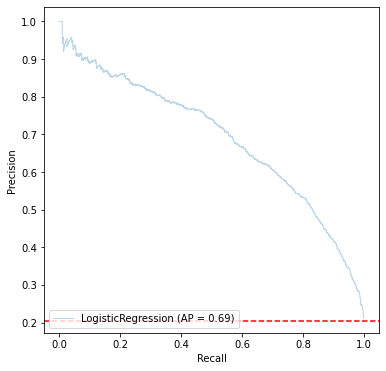

In [199]:
pos_label = "unstim_only"

def plot_pr(cm, mean_baseline, model, X_test, y_test, y_probs, pos_label):

    baseline = cm[1].sum()/cm.sum() # calculate baseline as true total pos.
    mean_baseline.append(baseline) # add baseline to mean baseline list
    
    # generate precision recall curve
    precision, recall, _ = precision_recall_curve(y_test,y_probs, pos_label = pos_label)

    # for CV validation, not important rn
    prs.append(np.interp(mean_recall, precision, recall)) # add predictions
    pr_auc = auc(recall, precision) # calculate aucs
    pr_aucs.append(pr_auc) # append to pr_aucs

    # plot the precision recall curve!
    fig, ax = plt.subplots(figsize = (6,6) )

    prcurve = plot_precision_recall_curve(model, X_test, y_test,                   
    #name='PR fold {}'.format(i),
    alpha=0.3, lw=1, ax=ax)

    
    # add the total positive baseline to the plot 
    ax.axhline(np.mean(mean_baseline), ls = "--", color ="r",\
      label='mean_baseline')

In [26]:
#p.savefig("%slogistic_regression_cv_%s.pdf" % (RE, sid), bbox_inches = "tight")